Вам необходимо провести базовый EDA выбранного набора данных.

   Требования к анализу:

   построить не менее 4 визуализаций различных видов;
   каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
   по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:

from pylab import rcParams
rcParams['figure.figsize'] = 25,7

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Diamonds
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
stats = df[['carat', 'cut', 'color', 'depth', 'price']]
stats

,carat,cut,color,depth,price
0,0.23,Ideal,E,61.5,326
1,0.21,Premium,E,59.8,326
2,0.23,Good,E,56.9,327
3,0.29,Premium,I,62.4,334
4,0.31,Good,J,63.3,335
...,...,...,...,...,...
53935,0.72,Ideal,D,60.8,2757
53936,0.72,Good,D,63.1,2757
53937,0.70,Very Good,D,62.8,2757
53938,0.86,Premium,H,61.0,2757


In [47]:
# Агрегируем количество имен по годам и по полу
cut_dynamics = stats[['cut', 'carat']]
cut_dynamics = cut_dynamics.groupby('cut').count().sort_values('carat', ascending=False)
cut_dynamics

,carat
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


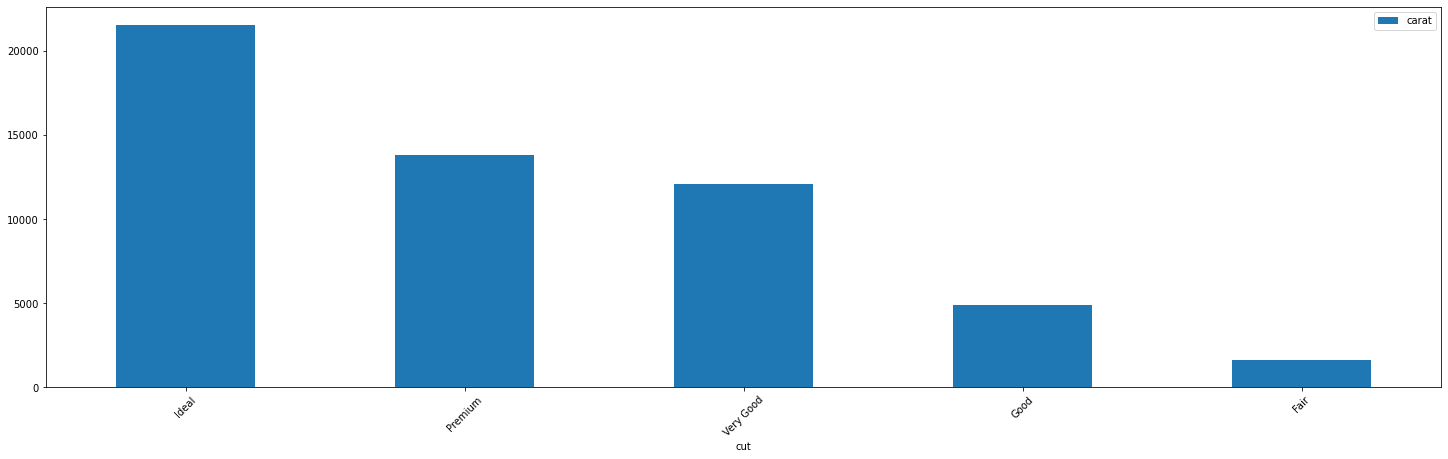

In [70]:
cut_dynamics.plot(kind='bar', rot=45, stacked=True)

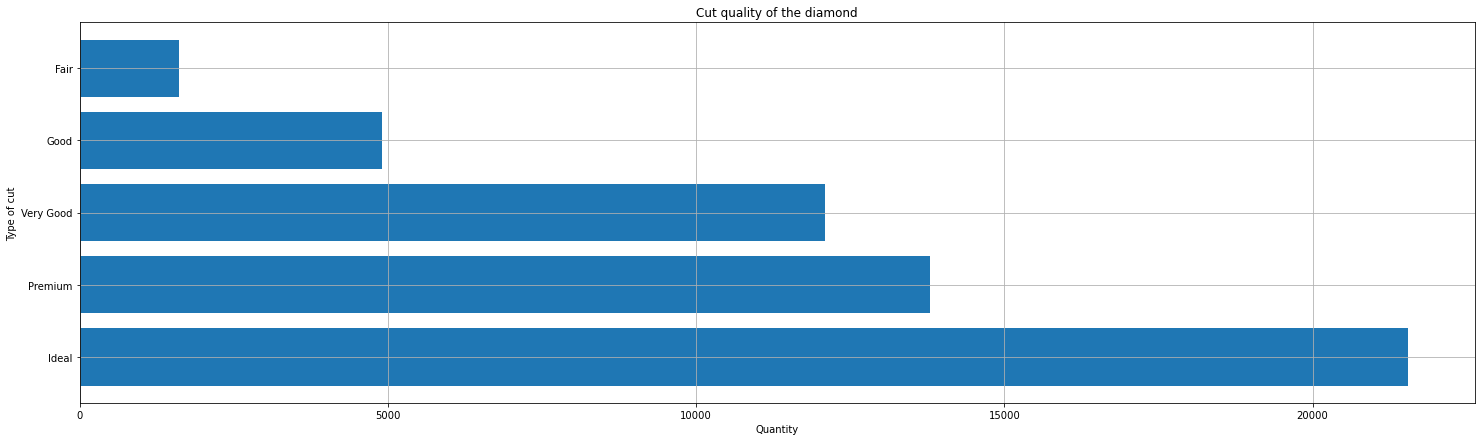

In [52]:
plt.barh(cut_dynamics.index, cut_dynamics['carat'])
plt.xlabel('Quantity')
plt.ylabel('Type of cut')
plt.title('Cut quality of the diamond')
plt.grid()

Из графиков видно какая разница в качестве огранки алмаза.

In [61]:
color_dynamics = stats[['color', 'carat']]
color_dynamics = color_dynamics.groupby(['color']).count().sort_values(by='carat', ascending=False)
color_dynamics

,carat
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


Text(0.5, 1.0, 'Quantity of colors')

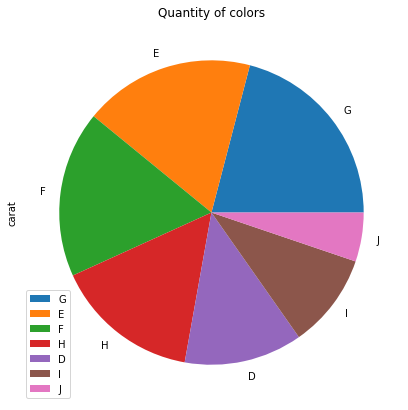

In [62]:
color_dynamics.plot(kind='pie', y='carat')
plt.title('Quantity of colors')

Цвет алмаза, где D-лучший, а J-худший. Из графика видно, что большинство алмазов цвета G и меньше всего J - самого худшего.



In [67]:
depth_dynamics = stats[['depth', 'carat']]
depth_dynamics = depth_dynamics.groupby('depth').count().sort_values('depth', ascending=False)
depth_dynamics

,carat
depth,
79.0,2
78.2,1
73.6,1
72.9,1
72.2,1
...,...
52.2,1
51.0,1
50.8,1


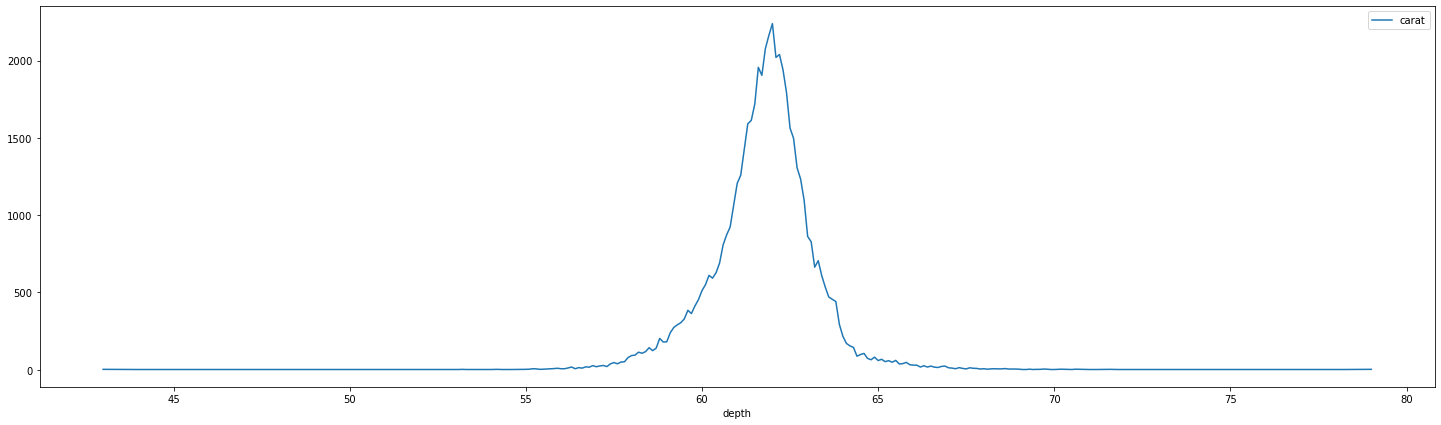

In [69]:
depth_dynamics.plot()

Тут видно, что большинство алмазов имеют глубину (отношение расстояния от площадки до калетты к среднему диаметру рундиста) от 60 до 65%